##### Exploratory Data Analysis (EDA) solving conflictsss

- 1 How does the distribution of startups vary across different states? (Location)
- 2 Which industry categories have the highest success rates among startups?? (Industries)
- 3 How does the total funding amount correlate with the success of startups? (Financial Backing)
- 4 Is there a correlation between the age of a startup and its success? (Maturity)
- 5 How do Relationships and Networking Impact Success? (Relationships)
- 6 How Does the Presence of Venture Capital Impact Success? (Venture Capital) - Finacing the startup with some risk

##### <span style="color: #add8e6;"> 1. Loading and Importing

In [1725]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [1726]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/gabrielaarzate/Desktop/predicting_startup_succes/notebook


In [1727]:
notebook_directory = 'data'
file_name = 'startup.csv'
file_path = os.path.join('..', 'data', 'startup.csv')
clean_data = pd.read_csv(file_path, encoding="ISO-8859-1")

In [1728]:
clean_data['status'] = clean_data.status.map({'acquired':1, 'closed':0})
clean_data.head(10)
clean_data.rename(columns={'status':'is_acquired'}, inplace=True)
clean_data

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,1
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,0
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,0
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,1


Learn how to interpret and explain what did you do to select only the variables that are relevant

 ##### How does the distribution of startups vary across different states? (Location) check

/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_32488/3601325464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_state["state_code"], y=df_state["funding_total_usd"], palette="Greens")


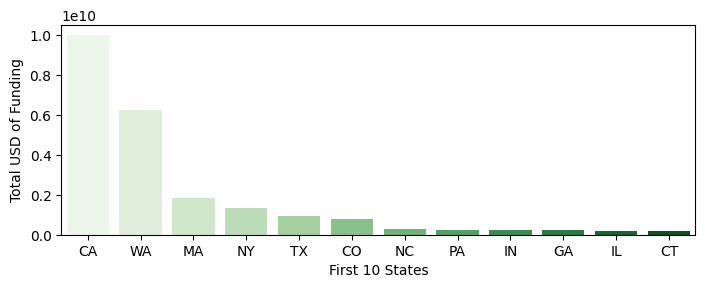

In [1729]:
df_state = clean_data.groupby(["state_code"])["funding_total_usd"].sum().sort_values(ascending=False).reset_index().head(12)

plt.figure(figsize=(18, 6), dpi=100)
plt.subplot(2, 2, 1)
plt.ylabel("Total USD of Funding")
plt.xlabel("First 10 States")
sns.barplot(x=df_state["state_code"], y=df_state["funding_total_usd"], palette="Greens")
plt.show()

##### Which industry categories have the highest success rates among startups?? (Industries) check

/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_32488/149967199.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="category_code", data=clean_data, order=order, palette="pastel", legend=False)


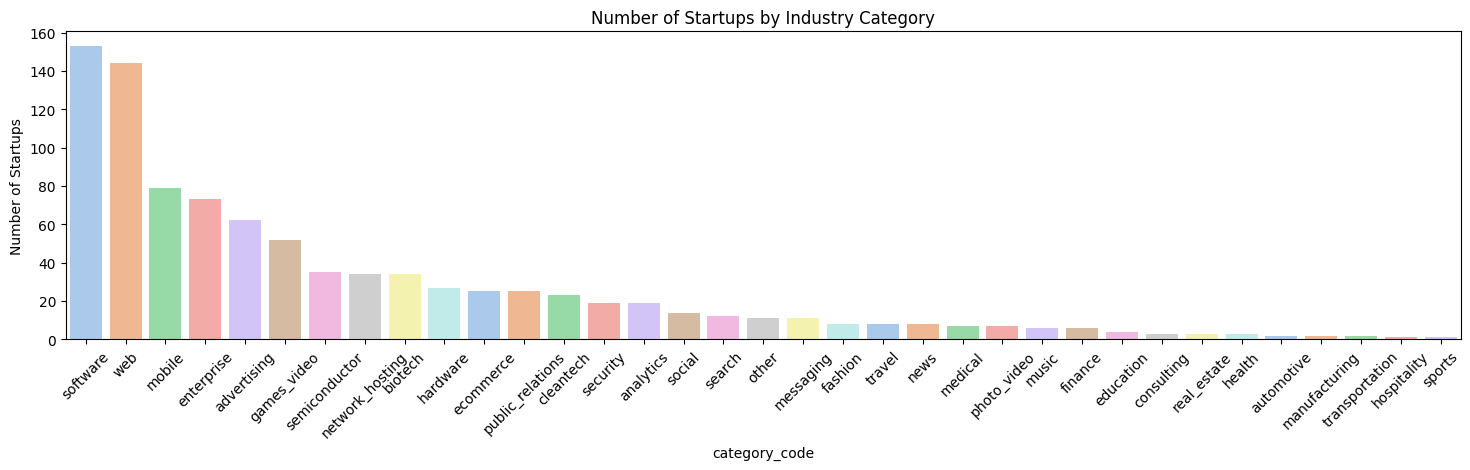

In [1730]:
import matplotlib.pyplot as plt
import seaborn as sns
order = clean_data["category_code"].value_counts().index

plt.figure(figsize=(18, 4), dpi=100)
plt.xticks(rotation=45)
plt.title("Number of Startups by Industry Category")

sns.countplot(x="category_code", data=clean_data, order=order, palette="pastel", legend=False)
plt.ylabel("Number of Startups")
plt.show()

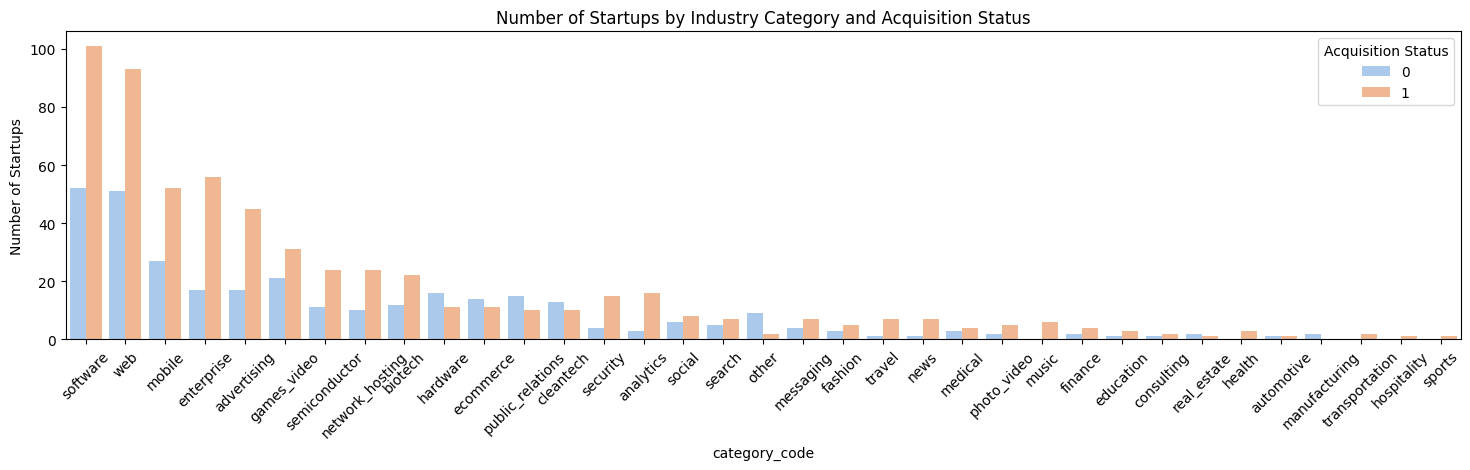

In [1731]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the order of categories based on their counts
order = clean_data["category_code"].value_counts().index

# Set the order of the legend
legend_order = [1, 0]  # Change the order if needed

# Create a custom color palette with the desired order
palette = sns.color_palette("pastel", n_colors=len(legend_order))
sns.set_palette([palette[i] for i in legend_order])

# Create a count plot with "is_acquired" information
plt.figure(figsize=(18, 4), dpi=100)
plt.xticks(rotation=45)
plt.title("Number of Startups by Industry Category and Acquisition Status")

# Stacked bar plot using hue for "is_acquired"
sns.countplot(x="category_code", data=clean_data, order=order, hue="is_acquired", palette='pastel')

plt.ylabel("Number of Startups")

# Create a new legend with the custom order
plt.legend(title="Acquisition Status", loc="upper right")

plt.show()



In [1732]:
# Assuming you have a DataFrame called 'data'
count_acquired_closed = clean_data['is_acquired'].value_counts()
# Print the count with labels
print(f'Acquired: {count_acquired_closed[1]}, Closed: {count_acquired_closed[0]}')

Acquired: 597, Closed: 326


##### <span style="color: #add8e6;"> 2. Cleaning the data 

**Drop the irrelevant features from 48 columns**

In [1733]:
clean_data = clean_data.drop(['Unnamed: 0','latitude','longitude','zip_code','id','Unnamed: 6','name','labels','state_code.1','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','object_id'], axis=1).copy()
clean_data

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,CA,San Diego,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,music,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,enterprise,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,web,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,software,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,games_video,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,San Francisco,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,...,advertising,0,0,1,0,0,0,6.0000,1,1
919,MA,Burlington,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,...,security,1,0,0,1,0,0,2.6667,1,0
920,CA,Sunnyvale,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,...,biotech,0,0,0,0,0,1,8.0000,1,0
921,CA,San Francisco,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,...,software,0,0,1,1,0,0,1.0000,1,1


In [1734]:
num_columns = len(clean_data.columns)
print(f"After dropping irrelevant features The DataFrame has {num_columns} columns.")

After dropping irrelevant features The DataFrame has 24 columns.


**Handle missing values**

The second step consists on eliminating noisy or unreliable data being the two most common cases
of inconsistencies, Missing Values and Outliers. 

A Missing value (or missing data) is a variable that has no data value stored in an observation. Missing values are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. 

In [1735]:
x= clean_data.isnull().sum()
x.sort_values(ascending=False)

closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
state_code                    0
category_code                 0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
funding_total_usd             0
milestones                    0
city                          0
funding_rounds                0
relationships                 0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
is_acquired                   0
dtype: int64

In [1736]:
# 2. Impute missing values with 0 to 'age_first_milestone_year'
clean_data['age_first_milestone_year'].fillna(-1, inplace=True)

# 3. Impute missing values with 0 to 'age_last_milestone_year'
clean_data['age_last_milestone_year'].fillna(-1, inplace=True)

**General Changes:*

- Imputed values for 'age_first_milestone_year' and 'age_last_milestone_year'.
- Handling Missing Values in 'closed_at': Missing values in 'closed_at' represent startups that are still open and will not be filled. This approach preserves the information that certain startups are still active without arbitrarily assigning a closure date.

 ##### <span style="color: #add8e6;">3. Correlation between variables without categorical values 

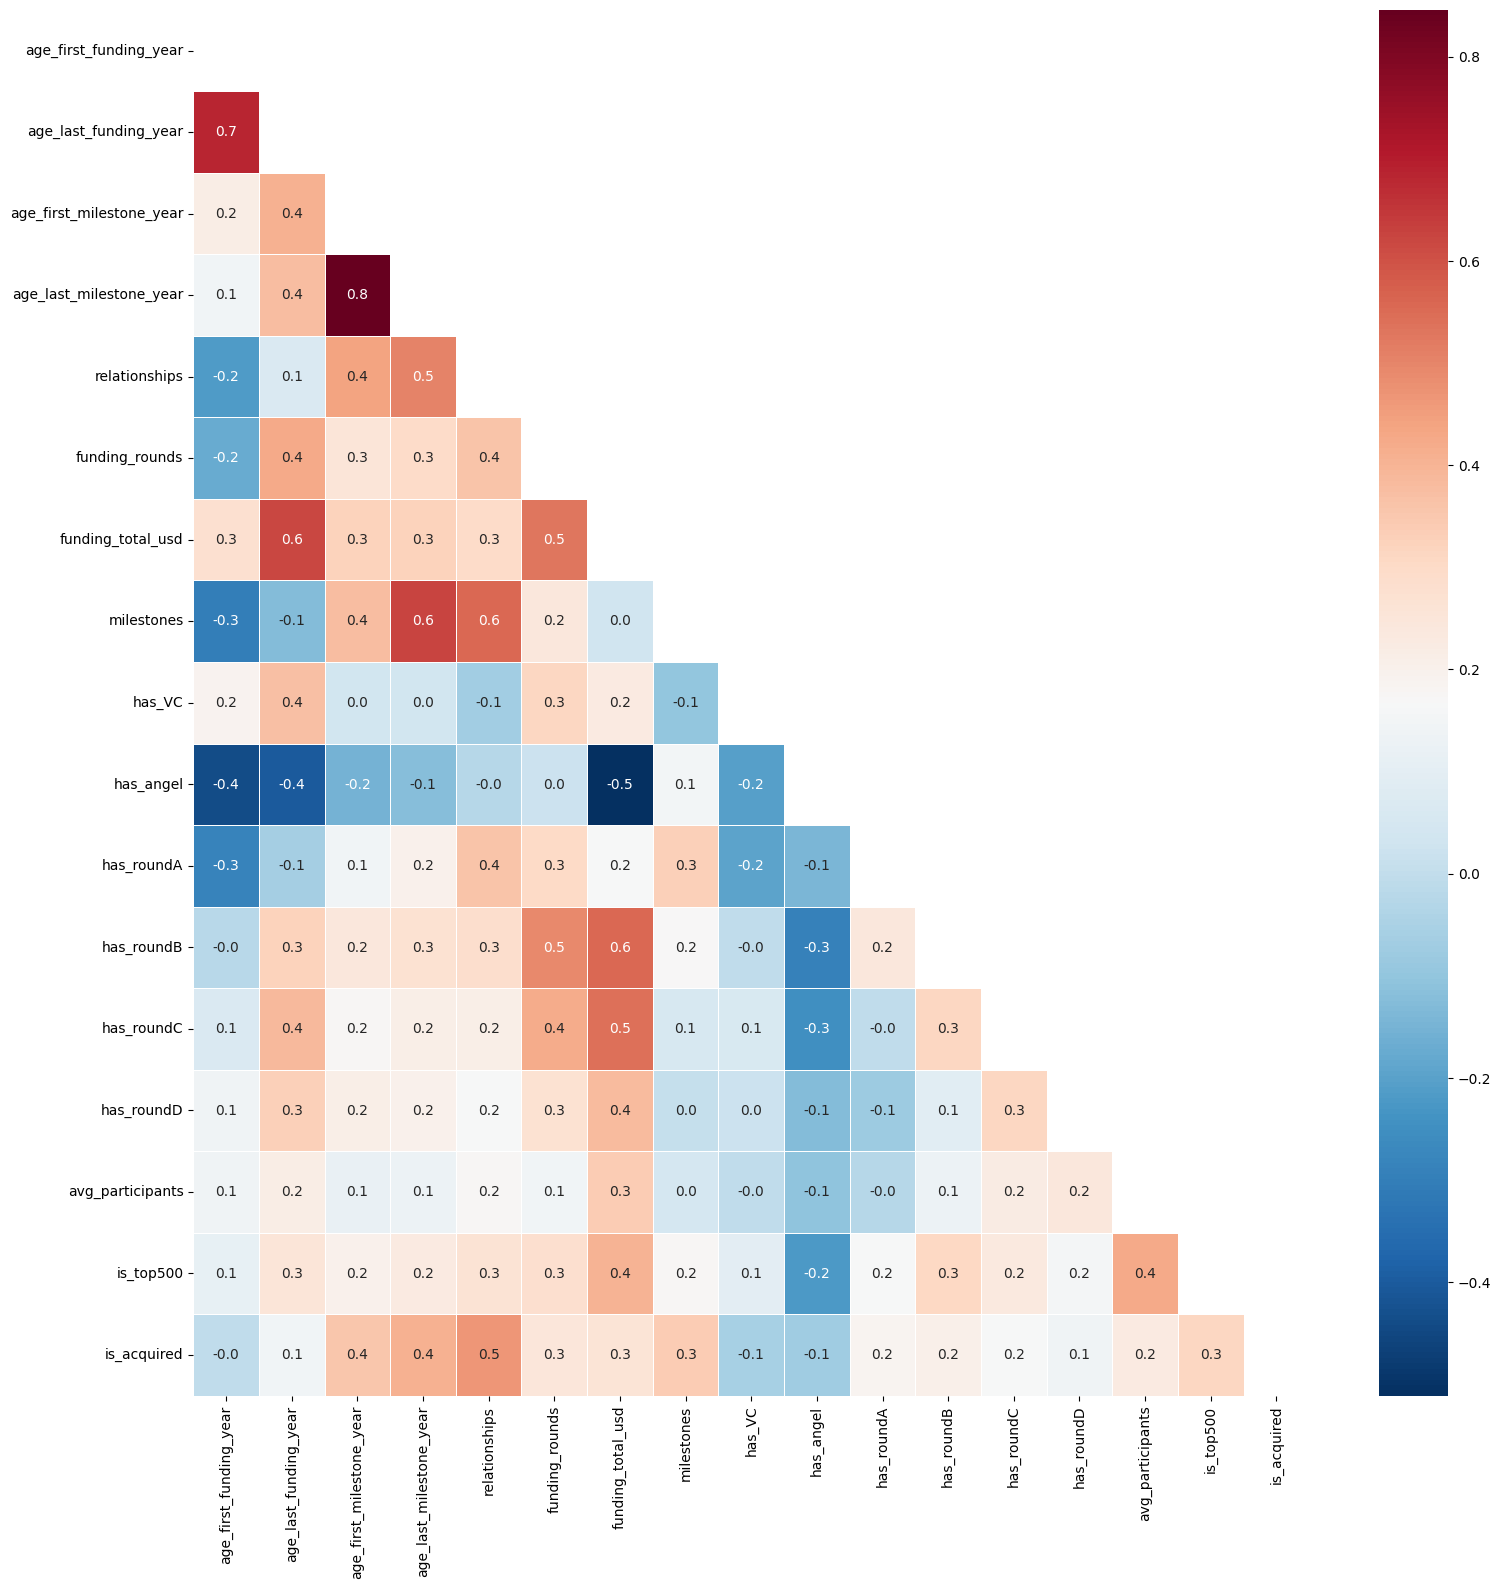

In [1737]:
def draw_heatmap(clean_data):
    f, ax = plt.subplots(figsize=(18, 18))
    
    # Use a diverging colormap (e.g., RdBu_r for Red-Blue reversed)
    cmap = sns.color_palette("RdBu_r", as_cmap=True)
    
    corrMatt = clean_data.corr(method='spearman')
    
    # Create a mask to hide the upper triangular part
    #To avoid redundancy and improve readability, it's common to visualize only one triangular part of the correlation matrix. 
    mask = np.triu(np.ones_like(corrMatt, dtype=bool))
    
    sns.heatmap(corrMatt, annot=True, linewidth=0.5, fmt='.1f', ax=ax, cmap=cmap, mask=mask)
    plt.show()
    ax.set_title('Multi-Collinearity of Features')

# Assuming 'data' is your DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df_1 = clean_data.select_dtypes(numerics)

draw_heatmap(numerical_df_1)



##### <span style="color: #add8e6;"> 4. Data Transformation

Converting Datetime to Numerical values

- Following variables : 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at'

In [1738]:
# Get the last closed startup
# Sort DataFrame by 'closed_at' in descending order
last_closed_startup = clean_data.sort_values(by='closed_at', ascending=False).iloc[0]
# Print a message indicating that this is the last startup that got closed
print("Data of the last startup that got closed:")
print(last_closed_startup)

Data of the last startup that got closed:
state_code                          NY
city                          New York
founded_at                    9/1/2010
closed_at                     9/8/2013
first_funding_at            12/20/2011
last_funding_at              2/18/2013
age_first_funding_year          1.3014
age_last_funding_year           2.4685
age_first_milestone_year           0.0
age_last_milestone_year         2.4685
relationships                        3
funding_rounds                       2
funding_total_usd              1800000
milestones                           2
category_code                education
has_VC                               1
has_angel                            1
has_roundA                           0
has_roundB                           0
has_roundC                           0
has_roundD                           0
avg_participants                   5.0
is_top500                            1
is_acquired                          0
Name: 899, dtype: obje

In [1739]:
# Get the first founded startup
first_founded_startup = clean_data.sort_values(by='founded_at').iloc[0]
# Print a message indicating that this is the last startup that got closed
print("Data of the first founded startup:")
print(first_founded_startup)

Data of the first founded startup:
state_code                          NC
city                           Raleigh
founded_at                    1/1/1984
closed_at                    5/21/2012
first_funding_at            11/18/2005
last_funding_at             11/18/2005
age_first_funding_year         21.8959
age_last_funding_year          21.8959
age_first_milestone_year       24.6849
age_last_milestone_year        24.6849
relationships                        1
funding_rounds                       1
funding_total_usd              8000000
milestones                           1
category_code                 software
has_VC                               1
has_angel                            0
has_roundA                           0
has_roundB                           0
has_roundC                           0
has_roundD                           0
avg_participants                   2.0
is_top500                            0
is_acquired                          0
Name: 675, dtype: object


In [1740]:
# Sort DataFrame by 'closed_at' in descending order
clean_data.sort_values(by='founded_at')

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
675,NC,Raleigh,1/1/1984,5/21/2012,11/18/2005,11/18/2005,21.8959,21.8959,24.6849,24.6849,...,software,1,0,0,0,0,0,2.0000,0,0
100,GA,Alpharetta,1/1/1985,5/3/2009,10/17/2005,10/17/2005,20.8055,20.8055,-1.0000,-1.0000,...,software,0,0,0,1,0,0,7.0000,1,0
264,TX,The Woodlands,1/1/1992,11/12/2011,5/29/2008,5/29/2008,16.4192,16.4192,-1.0000,-1.0000,...,cleantech,0,0,0,1,0,0,3.0000,0,0
719,CA,Santa Barbara,1/1/1995,6/1/2012,11/15/2005,11/15/2005,10.8795,10.8795,15.4986,15.4986,...,hardware,0,0,1,0,0,0,2.0000,1,0
824,AZ,Tempe,1/1/1996,7/8/2012,2/20/2007,2/20/2007,11.1452,11.1452,-1.0000,-1.0000,...,semiconductor,0,0,0,1,0,0,7.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,OH,Toledo,9/19/2009,5/1/2013,1/1/2011,1/1/2011,1.2849,1.2849,0.0000,0.0000,...,ecommerce,0,1,0,0,0,0,1.0000,0,0
131,IL,Chicago,9/24/2010,4/3/2012,10/15/2011,7/1/2012,1.0575,1.7699,1.0301,1.1123,...,games_video,0,1,0,0,0,0,1.0000,1,0
916,NY,New York,9/6/2006,NaN,9/6/2006,8/10/2010,0.0000,3.9288,2.9151,5.7342,...,advertising,1,0,1,1,0,0,2.3333,1,1
115,CA,San Francisco,9/9/2009,NaN,11/1/2009,3/11/2010,0.1452,0.5014,0.4959,3.0110,...,mobile,0,1,1,0,0,0,3.5000,1,1


In [1741]:
import pandas as pd
from datetime import datetime
# Assuming your_data_df is your main DataFrame
data_df = clean_data

# List of date columns
date_columns = ['founded_at','closed_at', 'first_funding_at', 'last_funding_at']

# Convert date columns to datetime
for date_column in date_columns:
    data_df[date_column] = pd.to_datetime(data_df[date_column], errors='coerce')

# Sort DataFrame by 'closed_at' in descending order
data_df.sort_values(by='closed_at')

# Find the last closing date
last_closed_date = data_df['closed_at'].dropna().iloc[0]

# Fill missing values in 'closed_at' with the last closing date
data_df['closed_at'].fillna(last_closed_date, inplace=True)

# Calculate the age of the startup based on the 'founded_at' and 'closed_at' (or current date)
current_date = datetime.now()
data_df['age'] = (data_df['closed_at'] - data_df['founded_at']).dt.days

In [1742]:
clean_data.head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,age
0,CA,San Diego,2007-01-01,2012-10-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,0,1,0,0,0,0,1.0000,0,1,2100
1,CA,Los Gatos,2000-01-01,2012-10-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,1,0,0,1,1,1,4.7500,1,1,4657
2,CA,San Diego,2009-03-18,2012-10-01,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,...,0,0,1,0,0,0,4.0000,1,1,1293
3,CA,Cupertino,2002-01-01,2012-10-01,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,...,0,0,0,1,1,1,3.3333,1,1,3926
4,CA,San Francisco,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,...,1,1,0,0,0,0,1.0000,1,0,792
5,CA,Mountain View,2002-01-01,2009-02-15,2006-07-18,2006-07-18,4.5452,4.5452,5.0027,5.0027,...,0,0,0,1,0,0,3.0000,1,0,2602
6,CA,Mountain View,2005-01-01,2012-10-01,2006-09-21,2010-03-18,1.7205,5.2110,3.0000,6.6082,...,1,0,1,1,0,0,1.6667,1,1,2830
7,CA,San Rafael,2004-01-01,2012-10-01,2005-08-24,2010-10-04,1.6466,6.7616,5.6055,7.3616,...,0,0,1,1,0,1,3.5000,1,1,3196
8,MA,Williamstown,2002-01-01,2012-10-01,2005-08-02,2013-02-08,3.5863,11.1123,8.0055,9.9945,...,1,0,1,0,0,1,4.0000,1,1,3926
9,CA,Palo Alto,2005-06-01,2012-10-01,2007-02-01,2010-02-05,1.6712,4.6849,2.9178,6.1151,...,1,1,1,0,0,0,1.0000,1,1,2679


In [1743]:
print(clean_data['closed_at'].head(10))

0   2012-10-01
1   2012-10-01
2   2012-10-01
3   2012-10-01
4   2012-10-01
5   2009-02-15
6   2012-10-01
7   2012-10-01
8   2012-10-01
9   2012-10-01
Name: closed_at, dtype: datetime64[ns]


In [1744]:
print(clean_data['closed_at'].tail(10))

913   2010-11-05
914   2012-10-01
915   2012-12-02
916   2012-10-01
917   2012-10-01
918   2012-10-01
919   2008-06-25
920   2012-06-17
921   2012-10-01
922   2012-10-01
Name: closed_at, dtype: datetime64[ns]


In [1745]:
# Convert datetime to timestamp (numerical)
for date_column in date_columns:
    data_df[date_column] = data_df[date_column].astype(int)

In [1746]:
print(clean_data['closed_at'].tail(10))

913    1288915200000000000
914    1349049600000000000
915    1354406400000000000
916    1349049600000000000
917    1349049600000000000
918    1349049600000000000
919    1214352000000000000
920    1339891200000000000
921    1349049600000000000
922    1349049600000000000
Name: closed_at, dtype: int64


In [1747]:
clean_data.head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,age
0,CA,San Diego,1167609600000000000,1349049600000000000,1238544000000000000,1262304000000000000,2.2493,3.0027,4.6685,6.7041,...,0,1,0,0,0,0,1.0000,0,1,2100
1,CA,Los Gatos,946684800000000000,1349049600000000000,1108339200000000000,1261958400000000000,5.1260,9.9973,7.0055,7.0055,...,1,0,0,1,1,1,4.7500,1,1,4657
2,CA,San Diego,1237334400000000000,1349049600000000000,1269907200000000000,1269907200000000000,1.0329,1.0329,1.4575,2.2055,...,0,0,1,0,0,0,4.0000,1,1,1293
3,CA,Cupertino,1009843200000000000,1349049600000000000,1108598400000000000,1177459200000000000,3.1315,5.3151,6.0027,6.0027,...,0,0,0,1,1,1,3.3333,1,1,3926
4,CA,San Francisco,1280620800000000000,1349049600000000000,1280620800000000000,1333238400000000000,0.0000,1.6685,0.0384,0.0384,...,1,1,0,0,0,0,1.0000,1,0,792
5,CA,Mountain View,1009843200000000000,1234656000000000000,1153180800000000000,1153180800000000000,4.5452,4.5452,5.0027,5.0027,...,0,0,0,1,0,0,3.0000,1,0,2602
6,CA,Mountain View,1104537600000000000,1349049600000000000,1158796800000000000,1268870400000000000,1.7205,5.2110,3.0000,6.6082,...,1,0,1,1,0,0,1.6667,1,1,2830
7,CA,San Rafael,1072915200000000000,1349049600000000000,1124841600000000000,1286150400000000000,1.6466,6.7616,5.6055,7.3616,...,0,0,1,1,0,1,3.5000,1,1,3196
8,MA,Williamstown,1009843200000000000,1349049600000000000,1122940800000000000,1360281600000000000,3.5863,11.1123,8.0055,9.9945,...,1,0,1,0,0,1,4.0000,1,1,3926
9,CA,Palo Alto,1117584000000000000,1349049600000000000,1170288000000000000,1265328000000000000,1.6712,4.6849,2.9178,6.1151,...,1,1,1,0,0,0,1.0000,1,1,2679


Converting categorical to Numerical values
- Following variables : 'state_code', 'city', 'category_code'

In [1748]:
import pandas as pd

# List of categorical columns
categorical_columns = ['state_code', 'city', 'category_code']

# Create a function to generate mappings
def create_mapping(column):
    unique_values = clean_data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    return mapping

# Apply mapping for each categorical column
for column in categorical_columns:
    mapping = create_mapping(column)
    clean_data[column] = clean_data[column].map(mapping)

In [1749]:
clean_data.head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,age
0,0,0,1167609600000000000,1349049600000000000,1238544000000000000,1262304000000000000,2.2493,3.0027,4.6685,6.7041,...,0,1,0,0,0,0,1.0000,0,1,2100
1,0,1,946684800000000000,1349049600000000000,1108339200000000000,1261958400000000000,5.1260,9.9973,7.0055,7.0055,...,1,0,0,1,1,1,4.7500,1,1,4657
2,0,0,1237334400000000000,1349049600000000000,1269907200000000000,1269907200000000000,1.0329,1.0329,1.4575,2.2055,...,0,0,1,0,0,0,4.0000,1,1,1293
3,0,2,1009843200000000000,1349049600000000000,1108598400000000000,1177459200000000000,3.1315,5.3151,6.0027,6.0027,...,0,0,0,1,1,1,3.3333,1,1,3926
4,0,3,1280620800000000000,1349049600000000000,1280620800000000000,1333238400000000000,0.0000,1.6685,0.0384,0.0384,...,1,1,0,0,0,0,1.0000,1,0,792
5,0,4,1009843200000000000,1234656000000000000,1153180800000000000,1153180800000000000,4.5452,4.5452,5.0027,5.0027,...,0,0,0,1,0,0,3.0000,1,0,2602
6,0,4,1104537600000000000,1349049600000000000,1158796800000000000,1268870400000000000,1.7205,5.2110,3.0000,6.6082,...,1,0,1,1,0,0,1.6667,1,1,2830
7,0,5,1072915200000000000,1349049600000000000,1124841600000000000,1286150400000000000,1.6466,6.7616,5.6055,7.3616,...,0,0,1,1,0,1,3.5000,1,1,3196
8,1,6,1009843200000000000,1349049600000000000,1122940800000000000,1360281600000000000,3.5863,11.1123,8.0055,9.9945,...,1,0,1,0,0,1,4.0000,1,1,3926
9,0,7,1117584000000000000,1349049600000000000,1170288000000000000,1265328000000000000,1.6712,4.6849,2.9178,6.1151,...,1,1,1,0,0,0,1.0000,1,1,2679


In [1750]:
numerical_features = clean_data.select_dtypes(include=['number']).columns.tolist()
categorical_features = clean_data.select_dtypes(include=['object']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['status']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (25):
['state_code', 'city', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'is_acquired', 'age']

Categorical Features (0):
[]

Target Variable (1):
['status']


 ##### <span style="color: #add8e6;"> 5. Correlation between variables with categorical values 

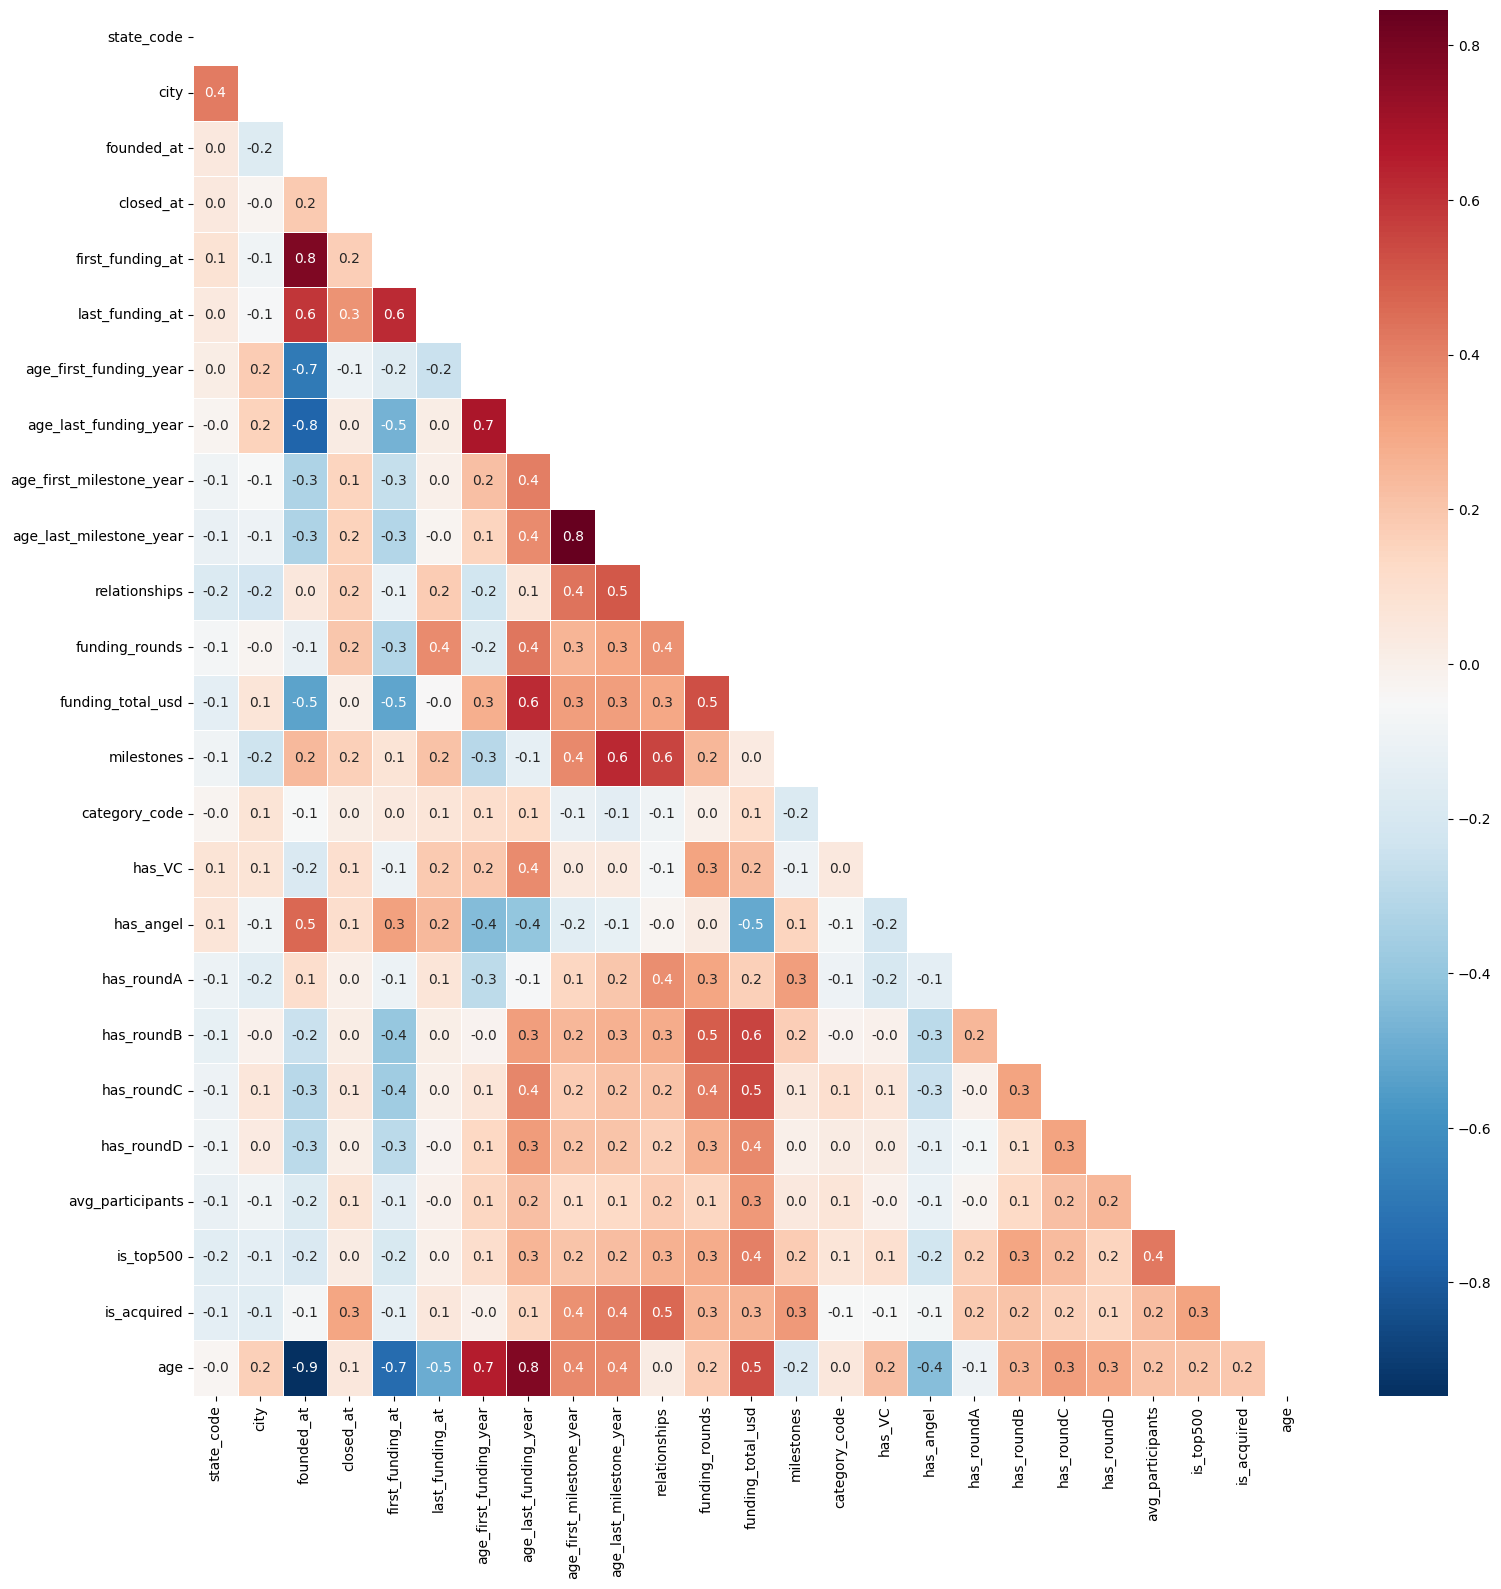

In [1751]:
def draw_heatmap(clean_data):
    f, ax = plt.subplots(figsize=(18, 18))
    
    # Use a diverging colormap (e.g., RdBu_r for Red-Blue reversed)
    cmap = sns.color_palette("RdBu_r", as_cmap=True)
    
    corrMatt = clean_data.corr(method='spearman')
    
    # Create a mask to hide the upper triangular part
    #To avoid redundancy and improve readability, it's common to visualize only one triangular part of the correlation matrix. 
    mask = np.triu(np.ones_like(corrMatt, dtype=bool))
    
    sns.heatmap(corrMatt, annot=True, linewidth=0.5, fmt='.1f', ax=ax, cmap=cmap, mask=mask)
    plt.show()
    ax.set_title('Multi-Collinearity of Features')

# Assuming 'data' is your DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df_1 = clean_data.select_dtypes(numerics)

draw_heatmap(numerical_df_1)

##### Is there a correlation between the age('founded_at - closed_at) of a startup and its success(is_acquire)? (Maturity)** need to add variable age 

In [1752]:
print(clean_data['founded_at'].head(10))

0    1167609600000000000
1     946684800000000000
2    1237334400000000000
3    1009843200000000000
4    1280620800000000000
5    1009843200000000000
6    1104537600000000000
7    1072915200000000000
8    1009843200000000000
9    1117584000000000000
Name: founded_at, dtype: int64


#####  How does the total funding amount correlate with the success of startups? (Financial Backing) check

correlation coefficient between a binary variable (like 'is_acquired') and a continuous variable (like 'funding_total_usd')

In [1753]:
print(clean_data['funding_total_usd'].head(10))

0      375000
1    40100000
2     2600000
3    40000000
4     1300000
5     7500000
6    26000000
7    34100000
8     9650000
9     5750000
Name: funding_total_usd, dtype: int64


In [1754]:
print(clean_data['is_acquired'].head(10))

0    1
1    1
2    1
3    1
4    0
5    0
6    1
7    1
8    1
9    1
Name: is_acquired, dtype: int64


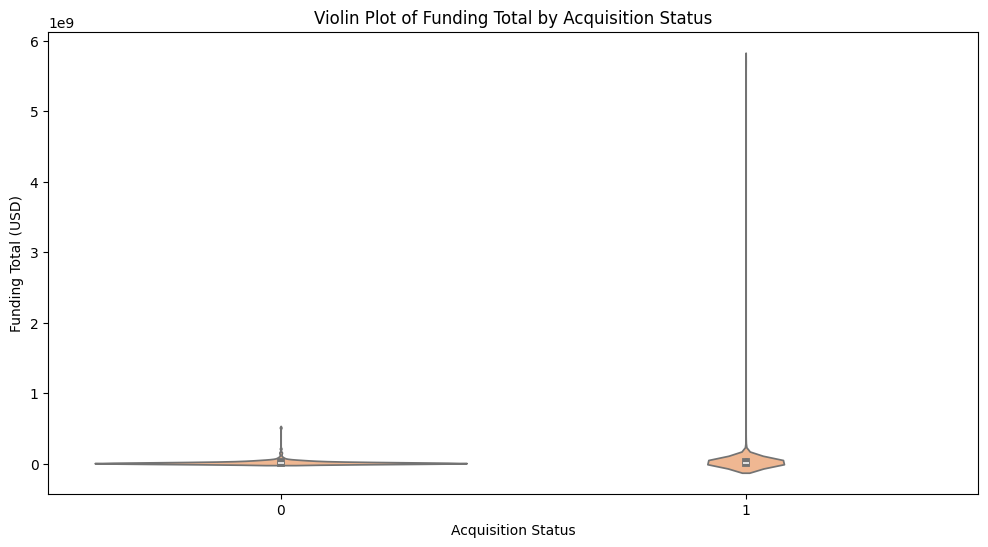

In [1755]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='is_acquired', y='funding_total_usd', data=clean_data)
plt.title('Violin Plot of Funding Total by Acquisition Status')
plt.xlabel('Acquisition Status')
plt.ylabel('Funding Total (USD)')
plt.show()


##### How do Relationships and Networking Impact Success? (Relationships)**

In [1756]:
print(clean_data['relationships'].head(10))

0     3
1     9
2     5
3     5
4     2
5     3
6     6
7    25
8    13
9    14
Name: relationships, dtype: int64


In [1757]:
print(clean_data['is_acquired'].head(10))

0    1
1    1
2    1
3    1
4    0
5    0
6    1
7    1
8    1
9    1
Name: is_acquired, dtype: int64


##### How Does the Presence of Venture Capital Impact Success? (Venture Capital) - Finacing the startup with some risk.** check

In [1758]:
print(clean_data['has_VC'].head(10))

0    0
1    1
2    0
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: has_VC, dtype: int64


In [1759]:
print(clean_data['is_acquired'].head(10))

0    1
1    1
2    1
3    1
4    0
5    0
6    1
7    1
8    1
9    1
Name: is_acquired, dtype: int64
